In [1]:
pip install torch torchvision


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset, DataLoader

from PIL import Image
from glob import glob

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder for the input image
        self.encoder_img = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )

        # Encoder for the wind data
        self.encoder_wind = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )

        # Decoder to generate the next frame
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, img, wind):
        img_encoded = self.encoder_img(img)
        wind_encoded = self.encoder_wind(wind)
        combined = torch.cat((img_encoded, wind_encoded), dim=1)
        decoded = self.decoder(combined)
        return decoded
    


# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
model = Autoencoder().to(device)



cuda


In [6]:
model.load_state_dict(torch.load(r'JaiMataDi.pth'))
model.eval()  # Set the model to evaluation mode


C:\Users\admin\AppData\Local\Temp\ipykernel_7388\2186076672.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'JaiMataDi.pth'))


Autoencoder(
  (encoder_img): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (encoder_wind): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

In [9]:
from torchvision import transforms  # Ensure this is imported


In [10]:

def load_image(image_path):
    image = Image.open(image_path).convert("L")  # Convert to grayscale if needed
    transform = transforms.Compose([
        transforms.Resize((512, 512)),  # Adjust based on your model's input size
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1] if needed
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension


In [11]:

image1 = load_image(r'output(with wind)\Day_31\3RIMG_31JAN2024_0545_L1C_ASIA_MER_BT_IR1_TEMP_V01R00.jpg')
image2 = load_image(r'output(with wind)\Day_31\3RIMG_31JAN2024_0445_L1C_ASIA_MER_BT_IR1_TEMP_V01R00.jpg')


In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

In [28]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Convert to RGB
    transform = transforms.Compose([
        transforms.Resize((512, 512)),  # Adjust based on your model's input size
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize to [-1, 1]
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension


In [15]:
wind_data1 = np.load(r'output(with wind)\Day_31\E06SCTL4AW_2024050_25km_v1.0.2.npy')

wind_data2 = np.load(r'output(with wind)\Day_31\E06SCTL4AW_2024050_25km_v1.0.2.npy')



In [16]:
wind_tensor1 = torch.from_numpy(wind_data1).float().unsqueeze(0).to(device)  # Add batch dimension
wind_tensor2 = torch.from_numpy(wind_data2).float().unsqueeze(0).to(device)  # Add batch dimension



In [17]:
num_steps = 10  # Number of interpolation steps
generated_images = []


In [29]:

def load_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Ensure it's RGB
    img = np.array(img)  # Convert to NumPy array
    return img  # Ensure this is a NumPy array


wind_tensor1 = torch.from_numpy(wind_data1).float().unsqueeze(0).to(device)  # Add batch dimension
wind_tensor2 = torch.from_numpy(wind_data2).float().unsqueeze(0).to(device)  # Add batch dimension

# Load images
image1 = load_image(r'output(with wind)\Day_31\3RIMG_31JAN2024_0545_L1C_ASIA_MER_BT_IR1_TEMP_V01R00.jpg')
image2 = load_image(r'output(with wind)\Day_31\3RIMG_31JAN2024_0445_L1C_ASIA_MER_BT_IR1_TEMP_V01R00.jpg')

# Ensure images are numpy arrays
print(type(image1), type(image2))  # Should print <class 'numpy.ndarray'> for both

# Convert images to tensors and move to device
image1_tensor = torch.from_numpy(image1).float().permute(2, 0, 1).unsqueeze(0).to(device)  # Add batch and channel dimensions
image2_tensor = torch.from_numpy(image2).float().permute(2, 0, 1).unsqueeze(0).to(device)  # Add batch and channel dimensions


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [31]:
with torch.no_grad():
    for alpha in np.linspace(0, 1, num_steps):
        # Interpolate images
        interpolated_image = (1 - alpha) * image1_tensor + alpha * image2_tensor
        
        # Ensure interpolated_image is on the correct device
        interpolated_image = interpolated_image.to(device)

        # Interpolate winds
        interpolated_wind = (1 - alpha) * wind_tensor1 + alpha * wind_tensor2
        
        # Ensure interpolated_wind is on the correct device
        interpolated_wind = interpolated_wind.to(device).permute(0, 3, 1, 2)
        # print(interpolated_wind.shape)

        # Pass through the model
        generated_image = model(interpolated_image, interpolated_wind)
        generated_images.append(generated_image.squeeze().cpu().numpy())  

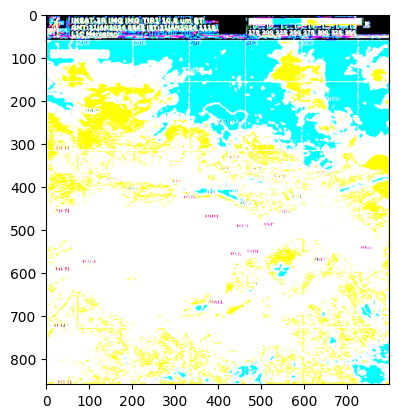

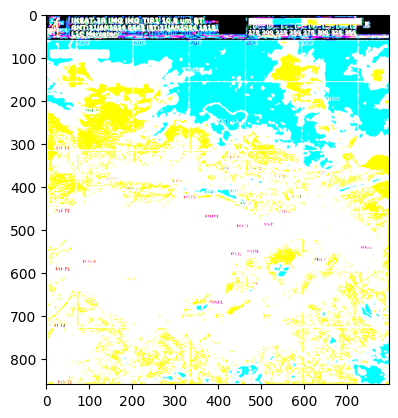

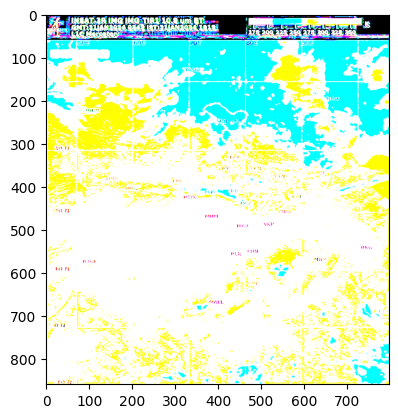

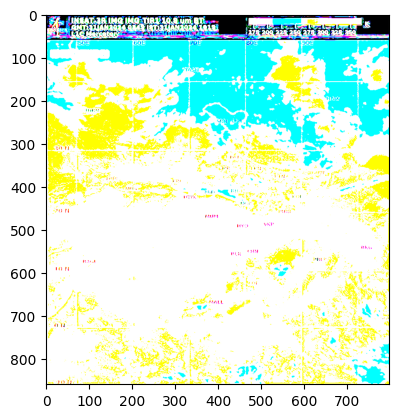

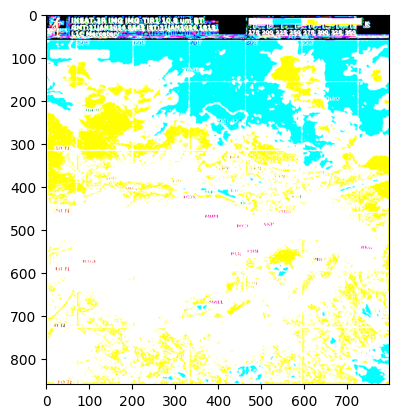

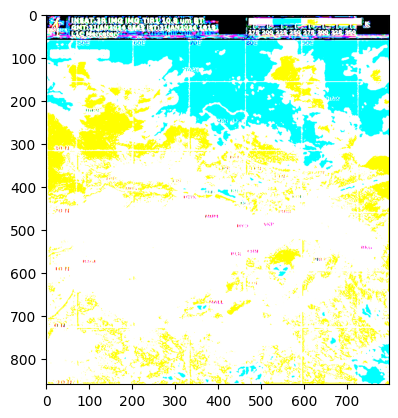

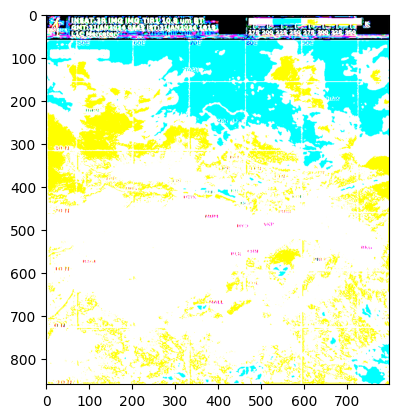

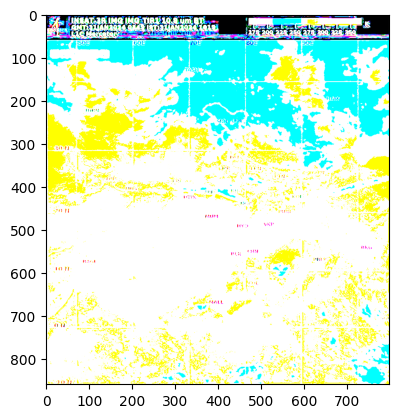

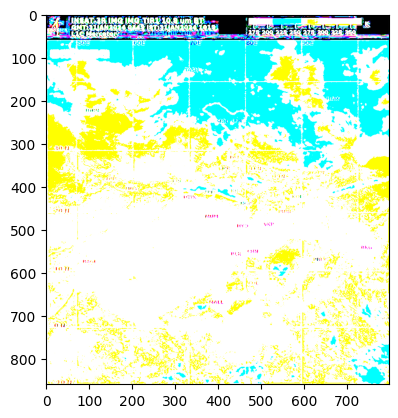

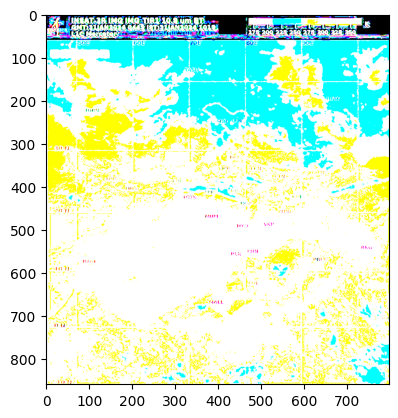

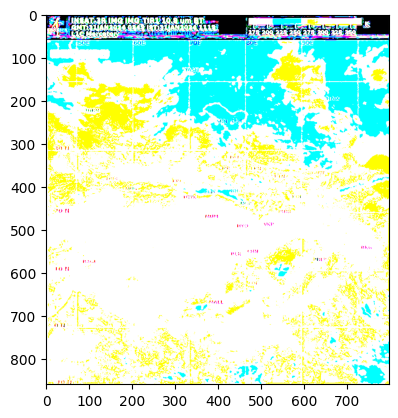

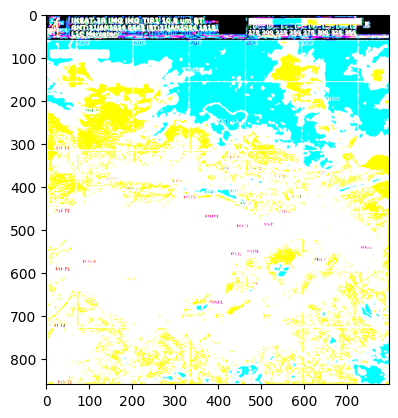

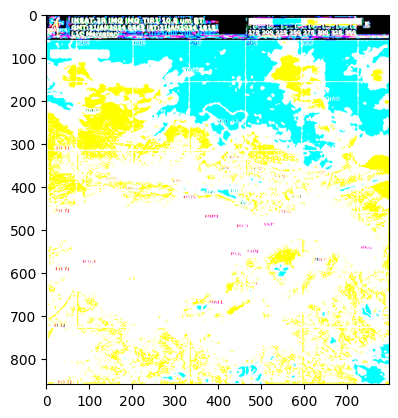

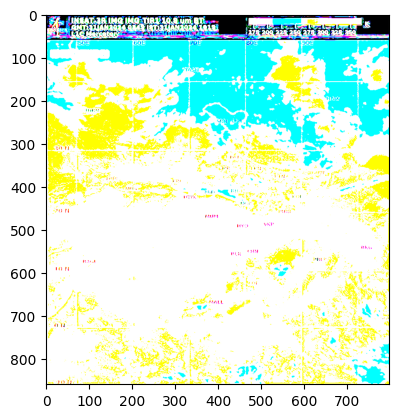

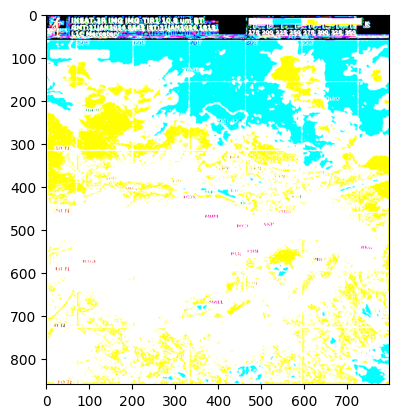

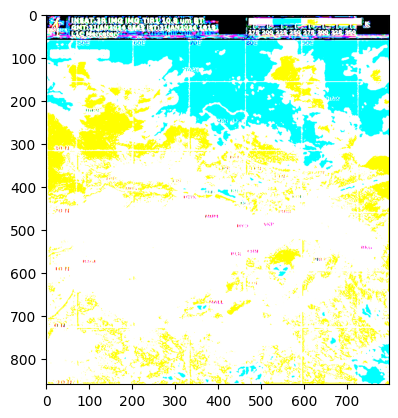

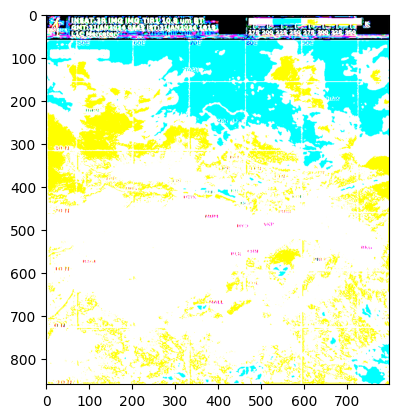

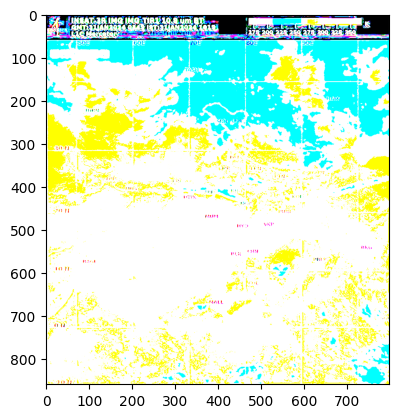

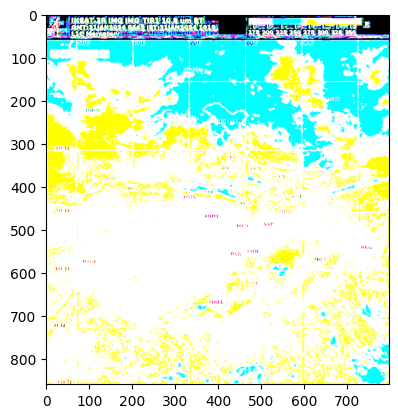

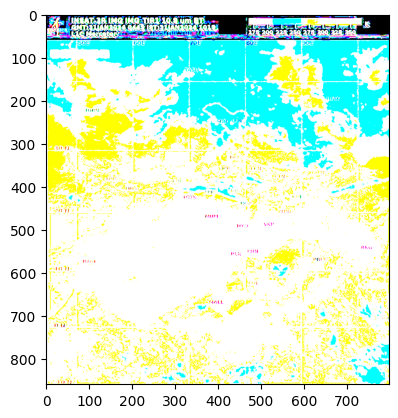

In [43]:
for i in range(len(generated_images)):
    plt.imshow(np.transpose( generated_images[i],(1, 2, 0)))
    plt.show()

In [45]:
pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
from torchsummary import summary
summary(model, input_size=[(3, 859, 796), (3, 859, 796)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 859, 796]             896
              ReLU-2         [-1, 32, 859, 796]               0
            Conv2d-3         [-1, 16, 859, 796]           4,624
              ReLU-4         [-1, 16, 859, 796]               0
            Conv2d-5          [-1, 8, 859, 796]           1,160
              ReLU-6          [-1, 8, 859, 796]               0
            Conv2d-7         [-1, 16, 859, 796]             448
              ReLU-8         [-1, 16, 859, 796]               0
            Conv2d-9          [-1, 8, 859, 796]           1,160
             ReLU-10          [-1, 8, 859, 796]               0
  ConvTranspose2d-11         [-1, 16, 859, 796]           2,320
             ReLU-12         [-1, 16, 859, 796]               0
  ConvTranspose2d-13         [-1, 32, 859, 796]           4,640
             ReLU-14         [-1, 32, 8

In [20]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [44]:
model.to(device)


Autoencoder(
  (encoder_img): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (encoder_wind): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)